## GAN aplicado al dataset CIFAR-10

Autor : Pablo Gonzalez  
Fecha : 4/10/2025

In [55]:
#Imports
import sys
sys.path.append("../src") 
import models, data, utils, train
import importlib
importlib.reload(models)
importlib.reload(data)
importlib.reload(utils)
importlib.reload(train)
from data import load_real_samples, get_class_names, generate_real_samples, generate_latent_points, generate_fake_samples
from models import GAN
from train import train_gan
from utils import save_plot, show_grid, save_model_plots

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import plot_model

In [44]:
# Cargamos el dataset cifar y preprocesamos(ya normalizado)
X_train = load_real_samples()

(50000, 32, 32, 3)


In [45]:
# Nombres de las clases de CIFAR-10
cifar10_classes = get_class_names()
print(cifar10_classes)

['avion', 'automovil', 'pajaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camion']


Vamos a conocer como son las imagenes del dataset

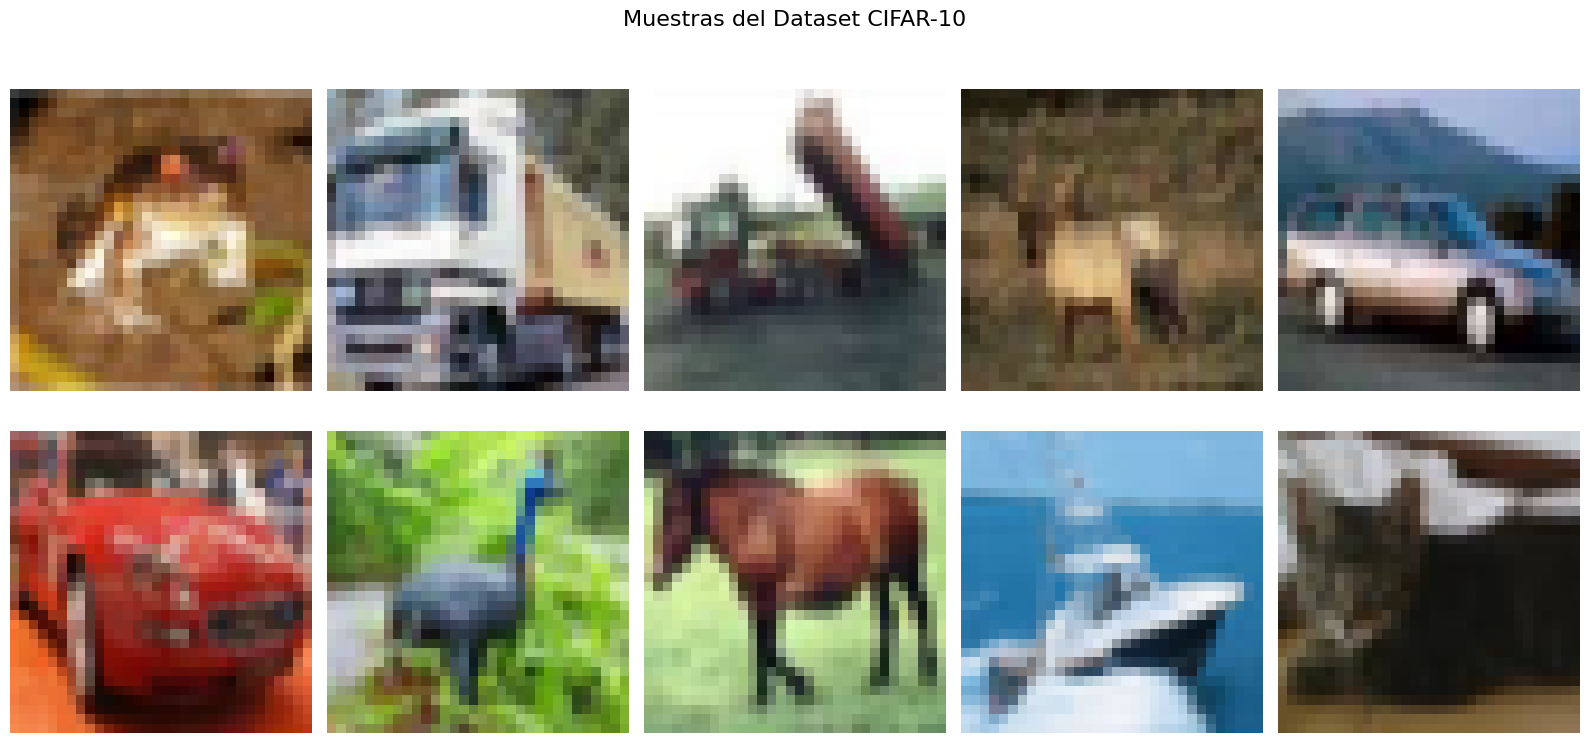

In [46]:
fig, axes = plt.subplots(2, 5, figsize=(16, 8))
axes = axes.ravel()
for i in range(10):
    img = X_train[i]
    # Escalamos de vuelta de [-1, 1] a [0, 1] para visualización
    img_display = (img + 1) / 2
    axes[i].imshow(img_display)
    axes[i].axis('off')

plt.suptitle('Muestras del Dataset CIFAR-10', fontsize=16)
plt.tight_layout()
plt.show()

In [47]:
gan = GAN(latent_dim=100)
gan.generator.summary()
gan.discriminator.summary()

c:\Users\pgsan\OneDrive\Desktop\AprendizajeProfundo\project-ml-portfolio\portfolio\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\pgsan\OneDrive\Desktop\AprendizajeProfundo\project-ml-portfolio\portfolio\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\pgsan\OneDrive\Desktop\AprendizajeProfundo\project-ml-portfolio\portfolio\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regula

Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 522,497 (1.99 MB)

In [48]:
import os

# Agrega la ruta de Graphviz bin al PATH, ajusta según tu instalación
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

In [49]:
# Guardar diagramas (Graphviz/pydot ya puestos en requirements.txt)
save_model_plots(gan.generator, gan.discriminator, out_dir="../results", dpi=110)

('../results\\generator.png', '../results\\discriminator.png')

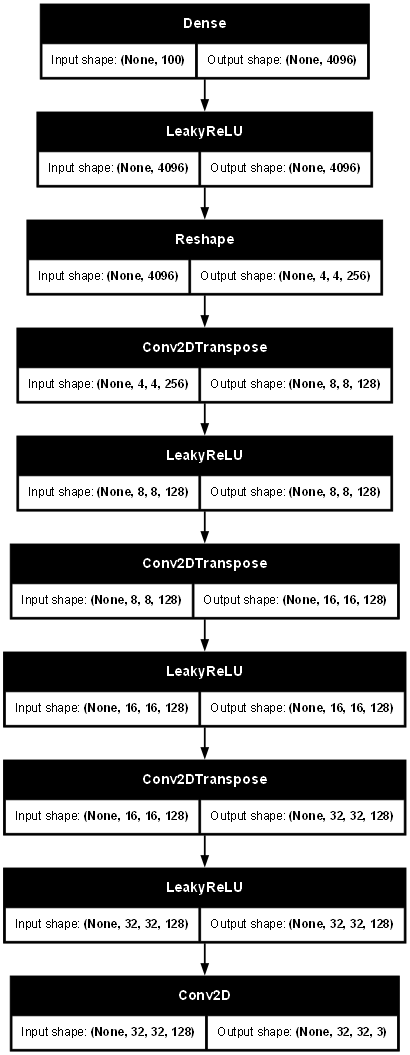

In [50]:
#Diagrama del generador
plot_model(gan.generator,show_shapes=True, dpi=64)


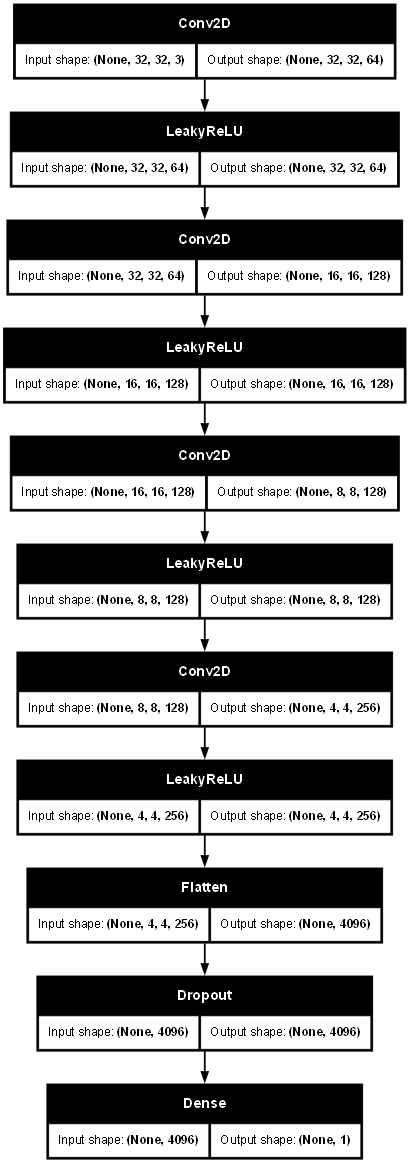

In [51]:
#Diagrama del discriminador
plot_model(gan.discriminator,show_shapes=True, dpi=64)

In [52]:
#ejemplos reales en el X_train
X_train.shape

(50000, 32, 32, 3)

Realizamos el entrenamiento ajustamos los epochs de acuerdo al hardware disponible

In [ ]:
train_gan(gan, X_train, n_epochs=100, n_batch=128, out_dir="../results")